In [1]:
"""
Created on Wed Mar 30 20:26:33 2022

@author: Shu-wei Huang
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Cost function and class
class CostFunction_circle1:
   
  def __init__(self,pts):
    self.pts=pts
  
  def f(self,x):
      r1=np.square(self.pts[0,:]-x[0]) + np.square(self.pts[1,:]-x[1])
      d=np.sqrt(r1)-x[2]
      return np.sum(d**2)

class CostFunction_circle2:
   
  def __init__(self,pts):
    self.pts=pts
  
  def f(self,x):
      r1=np.square(self.pts[0,:]-x[0]) + np.square(self.pts[1,:]-x[1])
      d=np.sqrt(r1)-x[2]
      return np.sum(np.abs(d))

def make_circle(n, x,y,r):
  
  t=np.linspace(0,2*np.pi,n,endpoint=False)
  p=np.zeros((2,n))
  p[0,:]=x+r*np.cos(t)
  p[1,:]=y+r*np.sin(t)
  return p

<function matplotlib.pyplot.show(*args, **kw)>

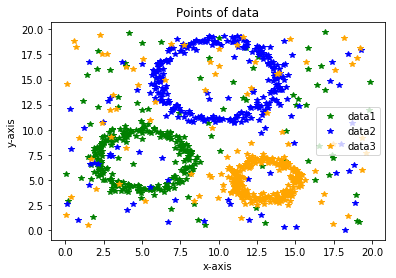

In [2]:
data1 = np.loadtxt("L10_test_data1.txt", dtype=float)
data2 = np.loadtxt("L10_test_data2.txt", dtype=float)
data3 = np.loadtxt("L10_test_data3.txt", dtype=float)

'''
Plot all points.
'''

plt.figure();
plt.plot(data1[:,0],data1[:,1],"g*")
plt.plot(data2[:,0],data2[:,1],"b*")
plt.plot(data3[:,0],data3[:,1],"*",c="orange")
plt.title("Points of data")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.legend(["data1","data2","data3"])
plt.show

In [3]:
'''
Minimize
'''
"Initial point"
x0=np.ones(3)

c1_1 = CostFunction_circle1(data1.T)
c1_2 = CostFunction_circle1(data2.T)
c1_3 = CostFunction_circle1(data3.T)

c2_1 = CostFunction_circle2(data1.T)
c2_2 = CostFunction_circle2(data2.T)
c2_3 = CostFunction_circle2(data3.T)

res_cir1_1 = minimize(c1_1.f,x0,method='Powell') 
res_cir1_2 = minimize(c1_2.f,x0,method='Powell') 
res_cir1_3 = minimize(c1_3.f,x0,method='Powell') 

res_cir2_1 = minimize(c2_1.f,x0,method='Powell') 
res_cir2_2 = minimize(c2_2.f,x0,method='Powell') 
res_cir2_3 = minimize(c2_3.f,x0,method='Powell') 

print("Data1 using cost function of d**2: Best fit has centre (", "{:.2f}".format(res_cir1_1.x[0]),",",
                            "{:.2f}".format(res_cir1_1.x[1]), ")",", radius ",
                            "{:.2f}".format(res_cir1_1.x[2]))
print("Data2 using cost function of d**2: Best fit has centre (", "{:.2f}".format(res_cir1_2.x[0]),",",
                            "{:.2f}".format(res_cir1_2.x[1]), ")",", radius ",
                            "{:.2f}".format(res_cir1_2.x[2]))
print("Data3 using cost function of d**2: Best fit has centre (", "{:.2f}".format(res_cir1_3.x[0]),",",
                            "{:.2f}".format(res_cir1_3.x[1]), ")",", radius ",
                            "{:.2f}".format(res_cir1_3.x[2]))
print("Data1 using cost function of abs(d): Best fit has centre (", "{:.2f}".format(res_cir2_1.x[0]),",",
                            "{:.2f}".format(res_cir2_1.x[1]), ")",", radius ",
                            "{:.2f}".format(res_cir2_1.x[2]))
print("Data2 using cost function of abs(d):  Best fit has centre (", "{:.2f}".format(res_cir2_2.x[0]),",",
                            "{:.2f}".format(res_cir2_2.x[1]), ")",", radius ",
                            "{:.2f}".format(res_cir2_2.x[2]))
print("Data3 using cost function of abs(d): Best fit has centre (", "{:.2f}".format(res_cir2_3.x[0]),",",
                            "{:.2f}".format(res_cir2_3.x[1]), ")",", radius ",
                            "{:.2f}".format(res_cir2_3.x[2]))

Data1 using cost function of d**2: Best fit has centre ( 10.75 , 10.25 ) , radius  7.20
Data2 using cost function of d**2: Best fit has centre ( 9.73 , 12.97 ) , radius  5.19
Data3 using cost function of d**2: Best fit has centre ( 9.14 , 11.12 ) , radius  7.54
Data1 using cost function of abs(d): Best fit has centre ( 5.19 , 7.08 ) , radius  3.14
Data2 using cost function of abs(d):  Best fit has centre ( 9.92 , 14.84 ) , radius  4.09
Data3 using cost function of abs(d): Best fit has centre ( 12.97 , 5.17 ) , radius  2.15


<function matplotlib.pyplot.show(*args, **kw)>

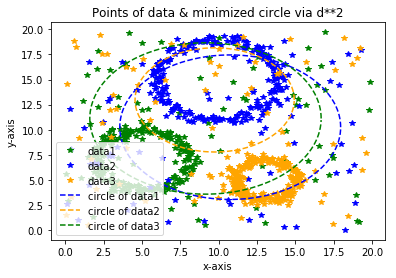

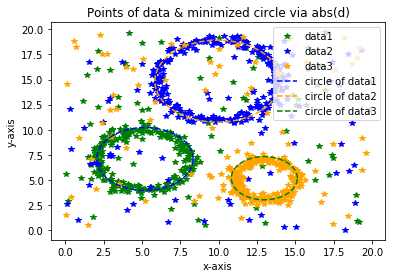

In [4]:
cir1_1 = make_circle(300,res_cir1_1.x[0], res_cir1_1.x[1], res_cir1_1.x[2])
cir1_2 = make_circle(300,res_cir1_2.x[0], res_cir1_2.x[1], res_cir1_2.x[2])
cir1_3 = make_circle(300,res_cir1_3.x[0], res_cir1_3.x[1], res_cir1_3.x[2])

cir2_1 = make_circle(300,res_cir2_1.x[0], res_cir2_1.x[1], res_cir2_1.x[2])
cir2_2 = make_circle(300,res_cir2_2.x[0], res_cir2_2.x[1], res_cir2_2.x[2])
cir2_3 = make_circle(300,res_cir2_3.x[0], res_cir2_3.x[1], res_cir2_3.x[2])

"Plot figure"
plt.figure();
plt.plot(data1[:,0],data1[:,1],"g*")
plt.plot(data2[:,0],data2[:,1],"b*")
plt.plot(data3[:,0],data3[:,1],"*",c="orange")
plt.plot(cir1_1[0,:],cir1_1[1,:],"--",c="blue")
plt.plot(cir1_2[0,:],cir1_2[1,:],"--",c="orange")
plt.plot(cir1_3[0,:],cir1_3[1,:],"--",c="green")
plt.title("Points of data & minimized circle via d**2")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.legend(["data1","data2","data3","circle of data1","circle of data2","circle of data3"])
plt.show

plt.figure();
plt.plot(data1[:,0],data1[:,1],"g*")
plt.plot(data2[:,0],data2[:,1],"b*")
plt.plot(data3[:,0],data3[:,1],"*",c="orange")
plt.plot(cir2_1[0,:],cir2_1[1,:],"--",c="blue")
plt.plot(cir2_2[0,:],cir2_2[1,:],"--",c="orange")
plt.plot(cir2_3[0,:],cir2_3[1,:],"--",c="green")
plt.title("Points of data & minimized circle via abs(d)")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.legend(["data1","data2","data3","circle of data1","circle of data2","circle of data3"])
plt.show